##  <center> DTI 5126: Fundamentals for Applied Data Science </center>
###  <center> Assignment 3 </center>
###  <center> Zeyad Elsayed </center>

## Part A: Clustering

> ### 1- Kmeans Clustering

In [223]:
df <- read.csv('Framingham.csv') # putting dataset into a frame 
head(df, 5) #looking at the first few rows of the dataset

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0


In [224]:
nrow(df) #size of dataset
ncol(df)

[1] 4240

[1] 16

#### The dataset contains 4240 records and 16 columns



*****

### Using only the Sex and Age fields (ensure you standardize Age)

In [291]:
df_scaled <- df[, c("male","age")]
df_scaled$age <- scale(df$age) #standardizing the age column
head(df_scaled,5)
print(paste0("Mean: ", colMeans(df_scaled$age)))  
print(paste0("sd: ", apply(df_scaled$age, 2, sd)))

male,age
1,-1.2341374
0,-0.4176149
1,-0.1843228
0,1.3320761
0,-0.4176149


[1] "Mean: 1.3327258583929e-16"
[1] "sd: 1"


#### The following dataframe is the result of only keeping the sex and age columns as well as standardizing the age column. I also made sure of the satandardization by checking that the mean is close to 0 and that the sd is 1.

-----
-----
###  a. Perform k‐means clustering on the selected attributes, specifying k = 4 clusters and plot.

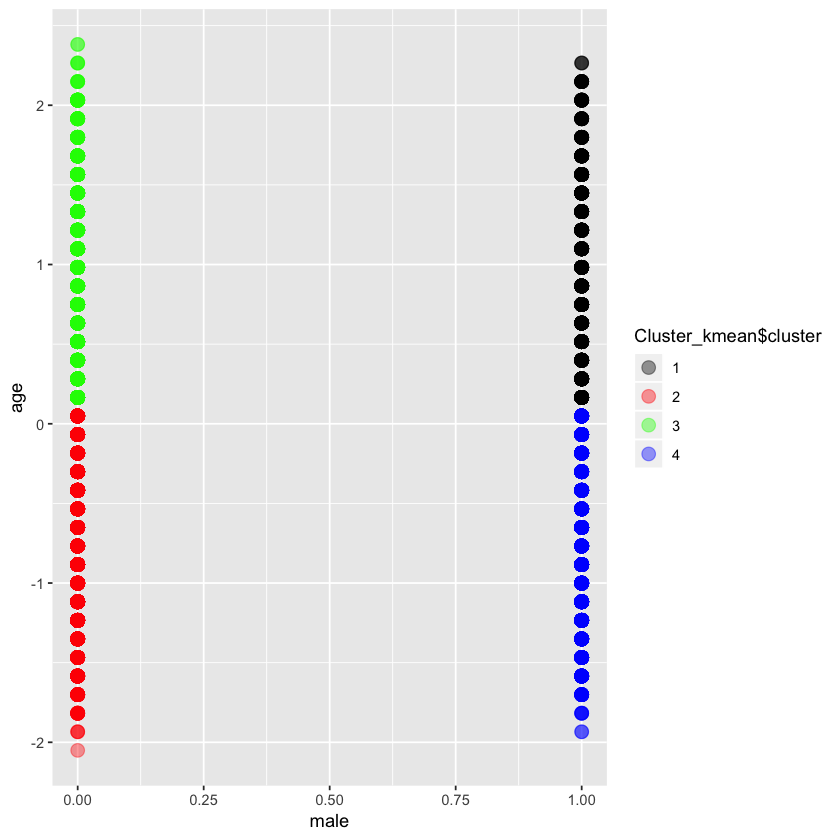

In [293]:
library(ggplot2) 
#setting seed
set.seed(917)

#kmeans
Cluster_kmean <- kmeans(df_scaled, 4, nstart = 20)

#Tabulate the cross distribution
#table(Cluster_kmean$cluster,df_scaled$TenYearCHD)

Cluster_kmean$cluster <- factor(Cluster_kmean$cluster)
#df_scaled$cluster <- factor(Cluster_kmean$cluster)

ggplot(df_scaled, aes(male, age, color = Cluster_kmean$cluster)) + 
  geom_point(alpha = 0.4, size = 3.5) +# geom_point(col = Cluster_kmean$cluster)
  scale_color_manual(values = c('black', 'red', 'green', 'blue'))


#### Based on the clustering plot, The kmeans model divided the 4 clusters accordingly:
     Cluster 1: Females with scaled age = (-0.3 > scaled age > -2 )
     Cluster 2: Males with scaled age = (-0.1 > scaled age > -2 )
     Cluster 3: Males and females with scaled age = -0.3 -> 0.7 for females and -0.1 -> 0.6 for males
     Cluster 4: Males and females with scaled age > 0.7 for females and > 0.6 for males

### b) Apply the elbow method to determine the best k and plot.

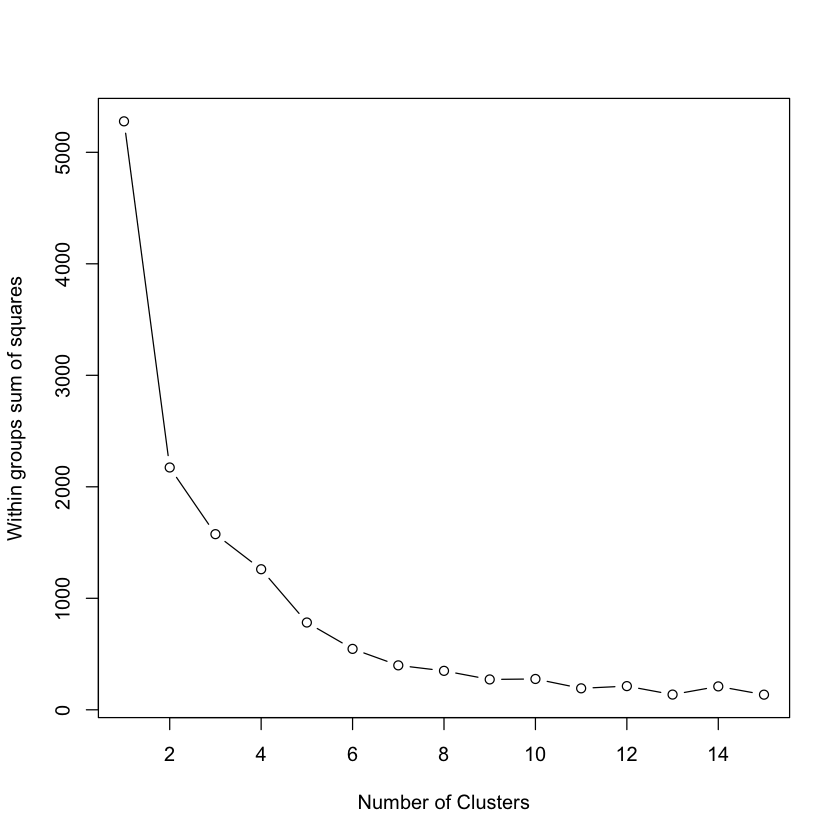

In [295]:
set.seed(617)
wss <- (nrow(df_scaled)-1)*sum(apply(df_scaled,2,var))
for (i in 2:15) {
  wss[i] <- sum(kmeans(df_scaled,centers=i)$withinss)
}
plot(1:15, wss, type="b", xlab="Number of Clusters",ylab="Within groups sum of squares")

#### Looking at the elbow curve the elbow is at point 6 which means that the number of clusters is 6 based on the elbow method.

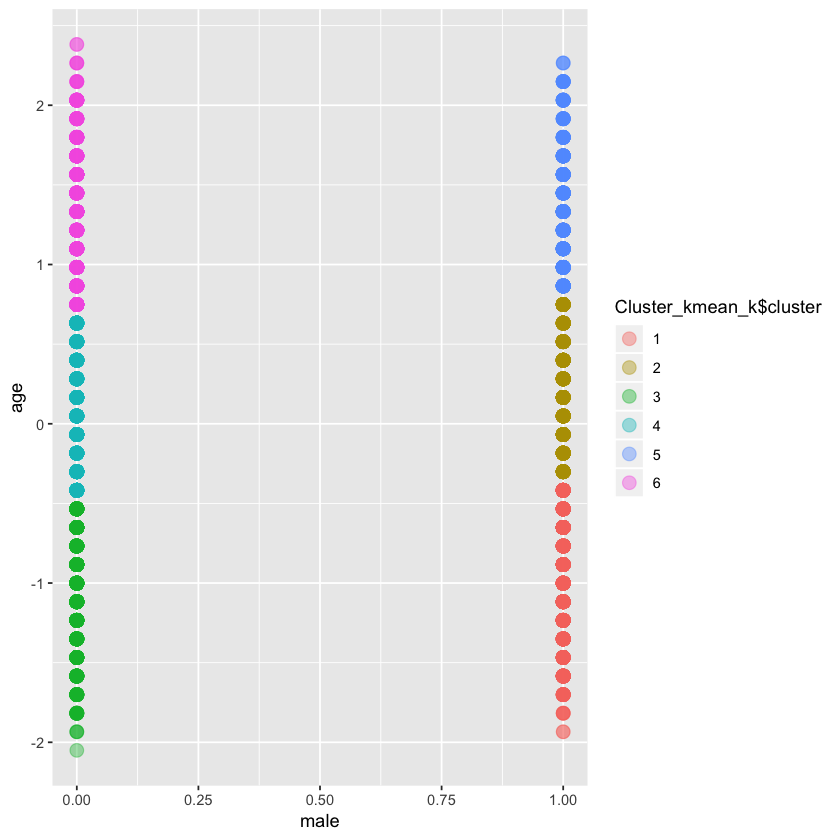

In [302]:
#setting seed
set.seed(917)

#kmeans
Cluster_kmean_k <- kmeans(df_scaled, 6, nstart = 20)

Cluster_kmean_k$cluster <- factor(Cluster_kmean_k$cluster)
#df_scaled$cluster <- factor(Cluster_kmean$cluster)

ggplot(df_scaled, aes(male, age, color = Cluster_kmean_k$cluster)) + 
  geom_point(alpha = 0.4, size = 3.5)# +# geom_point(col = Cluster_kmean$cluster)
  #scale_color_manual(values = c('black', 'red', 'green', 'blue'))

#### Based on the clustering plot using k=6 from the elbow method. The kmeans model divided the data into 6 clusters as shown in the plot above.

### c. Evaluate the quality of the clusters using the Silhouette Coefficient method

[1] "Silhouette score for kmeans with 2 clusters: 0.490265180163818" 
[2] "Silhouette score for kmeans with 3 clusters: 0.475400806541973" 
[3] "Silhouette score for kmeans with 4 clusters: 0.490140151397228" 
[4] "Silhouette score for kmeans with 5 clusters: 0.505261124212292" 
[5] "Silhouette score for kmeans with 6 clusters: 0.547327665124429" 
[6] "Silhouette score for kmeans with 7 clusters: 0.559011047506276" 
[7] "Silhouette score for kmeans with 8 clusters: 0.559185144183399" 
[8] "Silhouette score for kmeans with 9 clusters: 0.560241287405607" 
[9] "Silhouette score for kmeans with 10 clusters: 0.556367513277353"


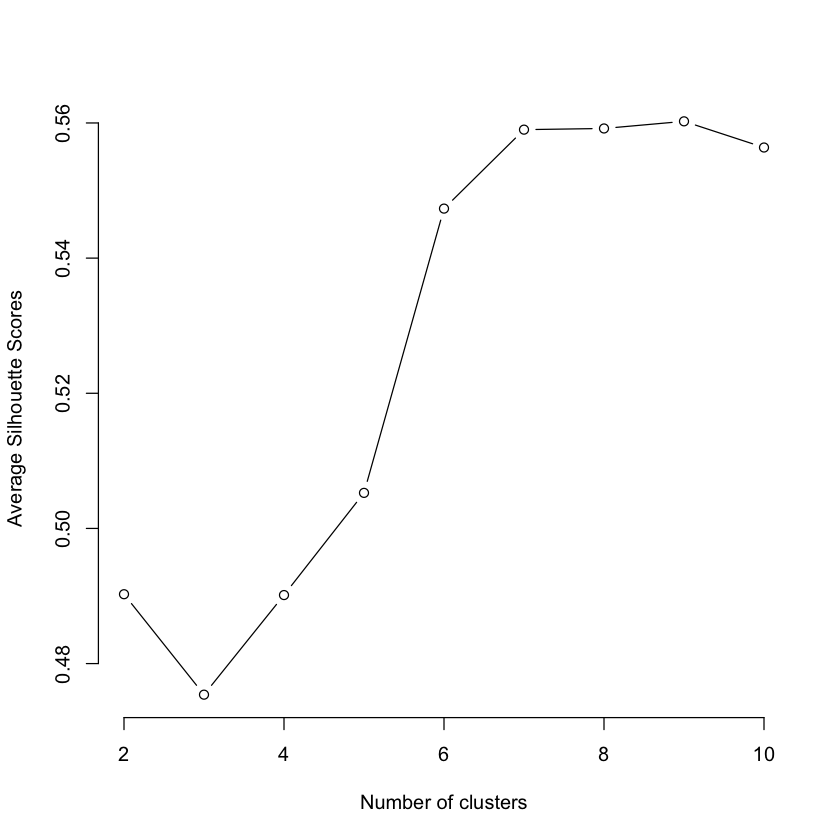

In [309]:
library(cluster) 
set.seed(917)
silhouette_score <- function(k){
  km <- kmeans(df_scaled, centers = k, nstart=20)
  ss <- silhouette(as.numeric(km$cluster), dist(df_scaled))
  mean(ss[, 3])}
k <- 2:10
avg_sil <- sapply(k, silhouette_score)
print(paste0("Silhouette score for kmeans with ",k, " clusters: ", avg_sil))

plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

#### The following plot shows the silhouette score for the number of clusters from 2 - 10. The k I chose depending on the elbow method was 6 which had a silhouette score of 0.547327665124429. 

> ### 2- Hierarchical Clustering
    > ### a- Single Linkage

<img src="IMG_1.jpg">

<img src="IMG_2.jpg">

<img src="IMG_3.jpg">

<img src="IMG_4.jpg">

<img src="IMG_5.jpg">

> ### b- Complete Linkage

<img src="IMG_6.jpg">

<img src="IMG_7.jpg">

<img src="IMG_8.jpg">

<img src="IMG_9.jpg">

## Part B Model Evaluation & Performance Improvement: 

### a. Partition the data set using the holdout method, so that 67% of the records are included in the training data set and 33% are included in the test data set. Use a bar graph to confirm your proportions.

In [246]:
library(caret)

customer_churn <- read.csv('customer_churn.csv') #read customer churn csv
head(customer_churn, 5)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [247]:
print(paste0("Number of records in dataset: ",nrow(customer_churn)))

set.seed(3456)
index <- createDataPartition(customer_churn$Churn, p = 0.67, list = FALSE) #split data 67% to testing
train_data <- customer_churn[index, ]
test_data <- customer_churn[-index,]
print(paste0("Number of records in training data: ",nrow(train_data)))
print(paste0("Number of records in testing data: ",nrow(test_data)))

[1] "Number of records in dataset: 7043"
[1] "Number of records in training data: 4720"
[1] "Number of records in testing data: 2323"


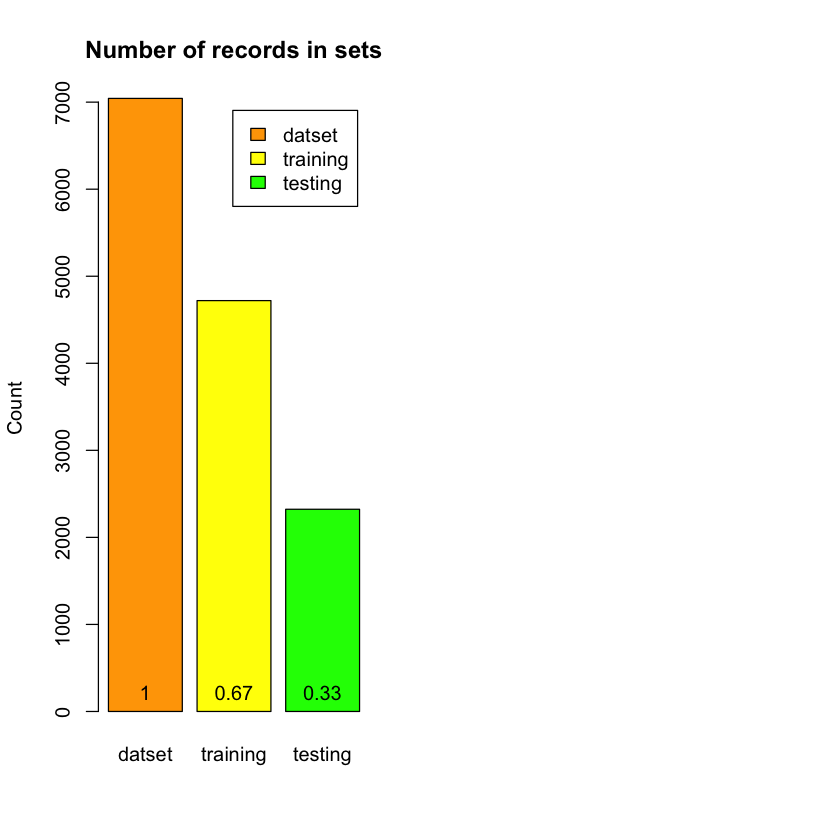

In [248]:
vector1 <- c(datset= nrow(customer_churn),training=nrow(train_data),testing= nrow(test_data)) #number of records in each set
vector2 <- c(nrow(customer_churn)/nrow(customer_churn),nrow(train_data)/nrow(customer_churn),nrow(test_data)/nrow(customer_churn)) #percentage of records in each set


par(mfrow=c(1,2))    # set the plotting area into a 1*2 array
bp <- barplot(vector1, main="Number of records in sets",
        ylab = "Count", width=c(500,500,500), col=c("orange", "yellow","green"),
        legend.text = c("datset", "training", "testing"), border="black")
text(bp, 0, round(vector2, 2),cex=1,pos=3) 

#### As seen in the previous output and bargraph the data was splitted into a trainig set (67%) and a testing set (0.33%).

### b. Identify the total number of records in the training data set and how many records in the training data set have a churn value of true (or 1). Calculate how many true churn records you need to resample in order to have 20% of the rebalanced data set have true churn values.

In [249]:
churn_yes <- sum(train_data$Churn == 'Yes') #944 churn 1 to be 20%
perc_churn <- churn_yes/nrow(train_data)
print(paste0("Number of records in training data: ",nrow(train_data)))
print(paste0("Number of churn in training data: ",churn_yes))
print(paste0("Percentage of churn in training data: ",perc_churn))

[1] "Number of records in training data: 4720"
[1] "Number of churn in training data: 1253"
[1] "Percentage of churn in training data: 0.265466101694915"


#### In the training set 26.5% of the records have churn = 1. The way I will resample this to reach 30% by using a combination of over and under sampling.

### c. Perform the rebalancing described in (b) and confirm that 20% of the records in the rebalanced data set have true churn values.

### since the churn percentage is higher than 20% the data has to be balanced to reach 30% churn rate.

In [253]:
library(ROSE)
resampled_train <- ovun.sample(Churn ~ ., data = train_data, method="both", p=0.3, seed=1)$data
churn_y <- sum(resampled_train$Churn == 'Yes') 
perc_ch <- churn_y/nrow(resampled_train)

print(paste0("Number of records in training data: ",nrow(resampled_train)))
print(paste0("Number of churn in training data: ",churn_y))
print(paste0("Percentage of churn in training data: ",perc_ch))

[1] "Number of records in training data: 4711"
[1] "Number of churn in training data: 1430"
[1] "Percentage of churn in training data: 0.303544894926767"


#### After the training data was resampled, it now has ~30% records with churn = 1.

### d. Create a decision tree model that can predict Churn using the data set given.  Use predictors you think are appropriate and obtain the predicted value.

In [254]:
set.seed(7) #set seed to get same results

library(mlbench)
library(caret)
library(caTools)
library(rpart)
library(rpart.plot)
library(dplyr)

drop <- c("customerID") #drop customer id column to not affect the importance
resampled_train = resampled_train[,!(names(resampled_train) %in% drop)]

model <- rpart(Churn ~ ., data = resampled_train, method = "class") #Making a classification model


importance <- varImp(model) #get the importance of features

print(importance)

                    Overall
Contract         366.937089
InternetService  371.724100
MonthlyCharges   155.482009
MultipleLines      8.053488
OnlineBackup      66.691715
OnlineSecurity   404.555209
PaymentMethod     10.119382
PhoneService       8.053488
SeniorCitizen     34.907592
StreamingTV        8.107969
TechSupport      342.237357
TotalCharges      72.641612
tenure           325.336002
gender             0.000000
Partner            0.000000
Dependents         0.000000
DeviceProtection   0.000000
StreamingMovies    0.000000
PaperlessBilling   0.000000


#### The following will be the predictors used Contract, InternetService, OnlineSecurity, TechSupport, tenure, MonthlyCharges, and TotalCharges.

In [256]:
df_model = subset(resampled_train, select = c(Contract, InternetService, OnlineSecurity, TechSupport, tenure, MonthlyCharges, TotalCharges, Churn) )
head(df_model,5)

Contract,InternetService,OnlineSecurity,TechSupport,tenure,MonthlyCharges,TotalCharges,Churn
One year,DSL,No,Yes,28,54.40,1516.60,No
Month-to-month,DSL,No,Yes,29,31.20,926.20,No
Two year,No,No internet service,No internet service,60,20.55,1205.05,No
One year,DSL,Yes,Yes,53,62.85,3419.50,No
Two year,DSL,Yes,Yes,42,48.15,2032.30,No


n= 4711 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 4711 1430 No (0.69645511 0.30354489)  
   2) Contract=One year,Two year 2081  170 No (0.91830851 0.08169149) *
   3) Contract=Month-to-month 2630 1260 No (0.52091255 0.47908745)  
     6) OnlineSecurity=No internet service,Yes 869  234 No (0.73072497 0.26927503) *
     7) OnlineSecurity=No 1761  735 Yes (0.41737649 0.58262351)  
      14) tenure>=16.5 684  286 No (0.58187135 0.41812865)  
        28) MonthlyCharges< 96.675 520  186 No (0.64230769 0.35769231) *
        29) MonthlyCharges>=96.675 164   64 Yes (0.39024390 0.60975610) *
      15) tenure< 16.5 1077  337 Yes (0.31290622 0.68709378)  
        30) InternetService=DSL 416  197 Yes (0.47355769 0.52644231)  
          60) MonthlyCharges>=55.4 81   21 No (0.74074074 0.25925926) *
          61) MonthlyCharges< 55.4 335  137 Yes (0.40895522 0.59104478) *
        31) InternetService=Fiber optic 661  140 Yes (0.21180030 0.78819970) *

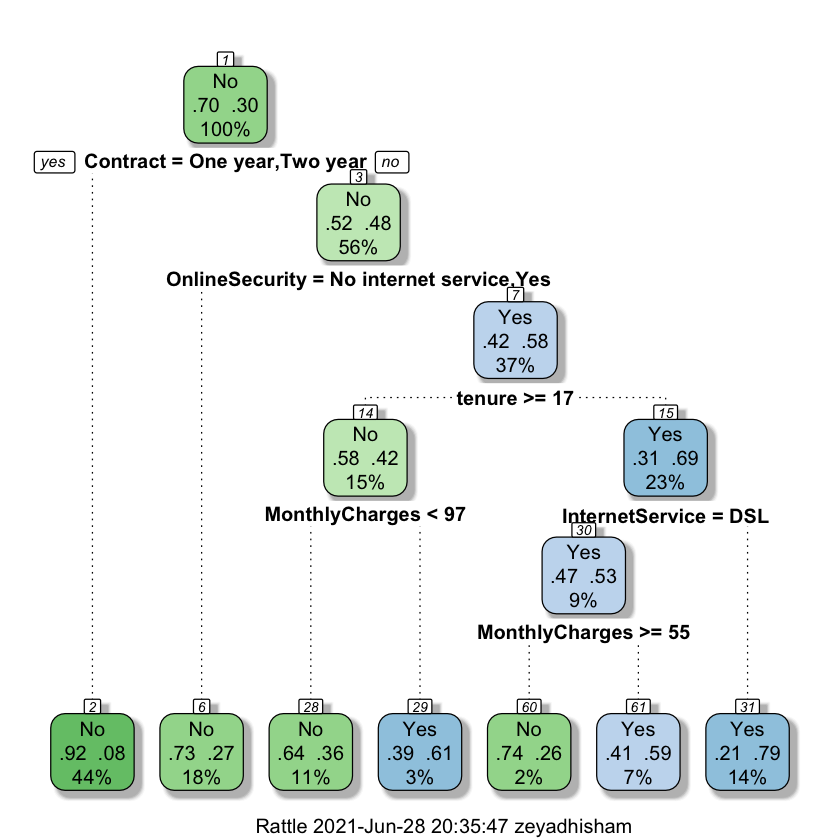

In [257]:
library(rattle)
library(RColorBrewer)

#decision tree model
mtree <- rpart(Churn~., data = df_model, method="class", control = rpart.control(minsplit = 20, minbucket = 7, maxdepth = 10, usesurrogate = 2, xval =10 ))

mtree #tree

fancyRpartPlot(mtree) #tree plot

#### The following is the decision tree with the following rules:

#### General rules:
 - #### Contract < three years -> no churn
 - #### OnlineSecurity = "No internet service" or "Yes"  -> no churn
 - #### tenure >=17 & MonthlyCharges<97 -> no churn
 - #### tenur <17 & InternetService = "DSL" & MonthlyCharges >=57 -> no churn
 - #### ELSE churn
 

In [258]:
drop <- c("customerID") #drop customer id column to not affect the importance
test_data = test_data[,!(names(test_data) %in% drop)]
pred <- predict(mtree, test_data, type = "class")
confusionMatrix(pred, test_data$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1483  280
       Yes  224  336
                                          
               Accuracy : 0.783           
                 95% CI : (0.7657, 0.7997)
    No Information Rate : 0.7348          
    P-Value [Acc > NIR] : 4.424e-08       
                                          
                  Kappa : 0.4266          
                                          
 Mcnemar's Test P-Value : 0.01429         
                                          
            Sensitivity : 0.8688          
            Specificity : 0.5455          
         Pos Pred Value : 0.8412          
         Neg Pred Value : 0.6000          
             Prevalence : 0.7348          
         Detection Rate : 0.6384          
   Detection Prevalence : 0.7589          
      Balanced Accuracy : 0.7071          
                                          
       'Positive' Class : No              
                        

#### The following is the confusion matrix of the decision tree as well as other evaluations.
- #### Accuracy: 0.783
- #### Sensitivity : 0.8688          
- #### Specificity : 0.5455 

### e. Use an ensemble method(e.g., Random Forest, Adaboost) to obtain the predicted value of Churn. Tune the hyper-parameters (e.g., node size, max depth, max terminal nodes, etc.) of the ensemble model and compare against the initial model.

In [264]:
library(randomForest)
set.seed(600)
# Perform training:
rf1 = randomForest(Churn ~ ., data=df_model, ntree=200, mtry=7, importance=TRUE, na.action=na.exclude)
pred_rf1<- predict(rf1, test_data, type = "class")
confusionMatrix(pred_rf1, test_data$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1454  289
       Yes  251  327
                                          
               Accuracy : 0.7673          
                 95% CI : (0.7496, 0.7844)
    No Information Rate : 0.7346          
    P-Value [Acc > NIR] : 0.0001622       
                                          
                  Kappa : 0.3913          
                                          
 Mcnemar's Test P-Value : 0.1113338       
                                          
            Sensitivity : 0.8528          
            Specificity : 0.5308          
         Pos Pred Value : 0.8342          
         Neg Pred Value : 0.5657          
             Prevalence : 0.7346          
         Detection Rate : 0.6265          
   Detection Prevalence : 0.7510          
      Balanced Accuracy : 0.6918          
                                          
       'Positive' Class : No              
                        

#### The following is the confusion matrix of the random forest without any hyper parameter tuning.
- #### Accuracy: 0.7673
- #### Sensitivity : 0.8528         
- #### Specificity : 0.5308

In [263]:

ctrl <- trainControl(method = "repeatedcv",
                     number = 10, repeats = 10,
                     selectionFunction = "best",
                     savePredictions = TRUE,
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)

# auto-tune a random forest
grid_rf <- expand.grid(mtry = c(5:10))

# test a random forest with the above settings
RNGversion("3.5.2") 
set.seed(300)
tuned_rf <- train(Churn ~ ., data = resampled_train, method = "rf",
              metric = "ROC", trControl = ctrl,
              tuneGrid = grid_rf, na.action=na.exclude)
tuned_rf

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
“non-uniform 'Rounding' sampler used”

Random Forest 

4711 samples
  19 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 4240, 4240, 4240, 4239, 4240, 4240, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   5    0.9479979  0.9383730  0.8023776
   6    0.9539104  0.9418475  0.8121678
   7    0.9565842  0.9433104  0.8209091
   8    0.9576692  0.9446812  0.8218182
   9    0.9583376  0.9445603  0.8230070
  10    0.9586574  0.9443163  0.8296503

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.

#### Using the cross validation with hyper parameter tuning the result was that the best number of mtry = 10

In [272]:
set.seed(300)
# Perform training:
rf = randomForest(Churn ~ ., data=resampled_train, ntree=200, mtry=10, importance=TRUE, na.action=na.exclude)
pred_rf<- predict(rf, test_data, type = "class")
confusionMatrix(pred_rf, test_data$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1480  273
       Yes  225  343
                                         
               Accuracy : 0.7854         
                 95% CI : (0.7682, 0.802)
    No Information Rate : 0.7346         
    P-Value [Acc > NIR] : 8.266e-09      
                                         
                  Kappa : 0.4357         
                                         
 Mcnemar's Test P-Value : 0.03519        
                                         
            Sensitivity : 0.8680         
            Specificity : 0.5568         
         Pos Pred Value : 0.8443         
         Neg Pred Value : 0.6039         
             Prevalence : 0.7346         
         Detection Rate : 0.6377         
   Detection Prevalence : 0.7553         
      Balanced Accuracy : 0.7124         
                                         
       'Positive' Class : No             
                                         

#### The following is the confusion matrix of the random forest without after hyper parameter tuning.
- #### Accuracy: 0.7854
- #### Sensitivity : 0.8680         
- #### Specificity : 0.5568

#### Comparing these results with the results before tuning the parameters the model improved by a little bit


>    |  | Before Tuning | After Tuning |
| --- | --- | --- |
| Accuracy | 0.7673 | 0.7854 |
| Sensitivity | 0.8528 | 0.8680 |
| Specificity | 0.5308 | 0.5568 |

### f. Using a confusion matrix, compare the evaluation measures from the ensemble method with the decision tree model based on the following criteria: Accuracy, Sensitivity and Specificity. Identify the model that performed best and worst according to each criterion.

In [161]:
confusionMatrix(pred, test_data$Churn)
confusionMatrix(pred_rf, test_data$Churn)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1633  403
       Yes   74  213
                                          
               Accuracy : 0.7947          
                 95% CI : (0.7777, 0.8109)
    No Information Rate : 0.7348          
    P-Value [Acc > NIR] : 1.166e-11       
                                          
                  Kappa : 0.3647          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9566          
            Specificity : 0.3458          
         Pos Pred Value : 0.8021          
         Neg Pred Value : 0.7422          
             Prevalence : 0.7348          
         Detection Rate : 0.7030          
   Detection Prevalence : 0.8765          
      Balanced Accuracy : 0.6512          
                                          
       'Positive' Class : No              
                        

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1573  372
       Yes  131  244
                                          
               Accuracy : 0.7832          
                 95% CI : (0.7659, 0.7998)
    No Information Rate : 0.7345          
    P-Value [Acc > NIR] : 3.347e-08       
                                          
                  Kappa : 0.3648          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9231          
            Specificity : 0.3961          
         Pos Pred Value : 0.8087          
         Neg Pred Value : 0.6507          
             Prevalence : 0.7345          
         Detection Rate : 0.6780          
   Detection Prevalence : 0.8384          
      Balanced Accuracy : 0.6596          
                                          
       'Positive' Class : No              
                        

#### Comparing the confusion matrices we get:


>    |  | Decision Tree | Random Forest After Tuning |
| --- | --- | --- |
| Accuracy | 0.783 | 0.7854 |
| Sensitivity | 0.8688 | 0.8680 |
| Specificity | 0.5455 | 0.5568 |

#### The better model according to the accuracy and the specificity is the Random forest after tuning. However, when it comes to sensitivity they both have about the same score with a difference of 0.0008 higher in the Decision tree.

### g. Carry out a ROC analysis to compare the performance of the ensemble method with the decision treetechnique. Plot the ROC graph of the model

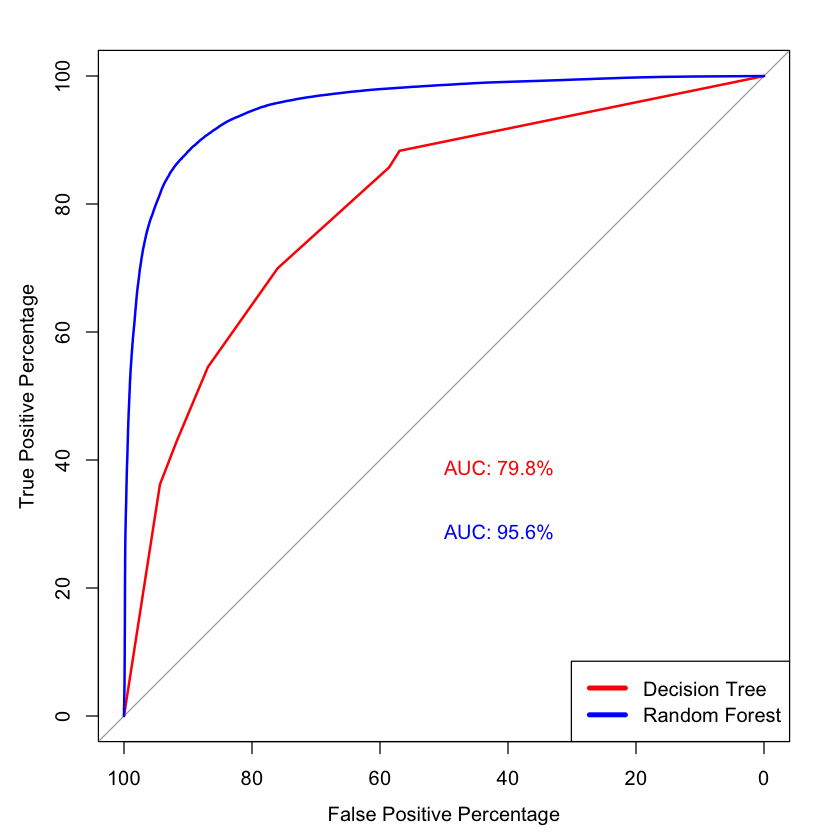

In [273]:
library(pROC)
#roc_dt <- roc(mtree$pred$obs, mtree$pred$Nes)
tree.preds <- predict(mtree, test_data, type="prob")[, 2]
roc_dt <- roc(test_data$Churn, tree.preds, percent=TRUE, xlab="False Positive Percentage", ylab= "True Positive Percentage", plot=TRUE, col="red", print.auc=TRUE, print.auc.y=40)
roc_rf <- roc(tuned_rf$pred$obs, tuned_rf$pred$No, percent=TRUE, xlab= "False Positive Percentage", ylab= "True Positive Percentage", plot=TRUE, add = TRUE, col = "blue", print.auc=TRUE, print.auc.y=30)
legend("bottomright", legend=c("Decision Tree", "Random Forest"), col=c("red", "blue"), lwd=4)

 |  | Decision Tree | Random Forest After Tuning |
| --- | --- | --- |
| AUC | 79.8% | 95.6% |


#### Based on the ROC curve and AUC the Random forest model after tuning is better with a much higher AUC 95.6% vs 79.8%.